In [13]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import math
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [14]:
import sys

sys.path.append("../src")

In [15]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features


random_state_for_sites_two = {'Foliage':50, 'Carp':60, 'Central':200, 'Telephone':160}
random_state_for_sites_three = {'Foliage':50, 'Carp':60, 'Central':200, 'Telephone':160}
color_for_groups = {0: 'blue', 1: 'red', 2:'limegreen'}
label_for_groups = {0: 'LF1', 1: 'HF1', 2:'HF2'}

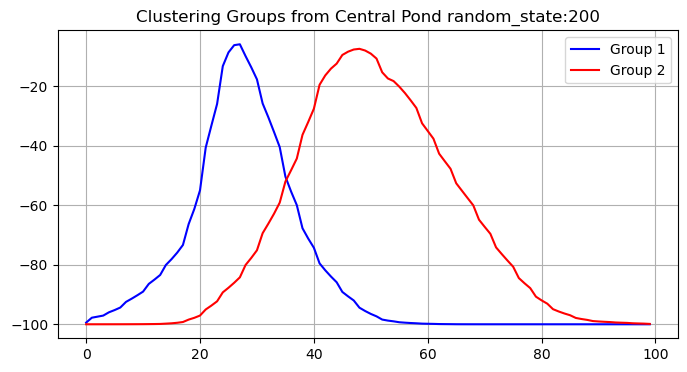

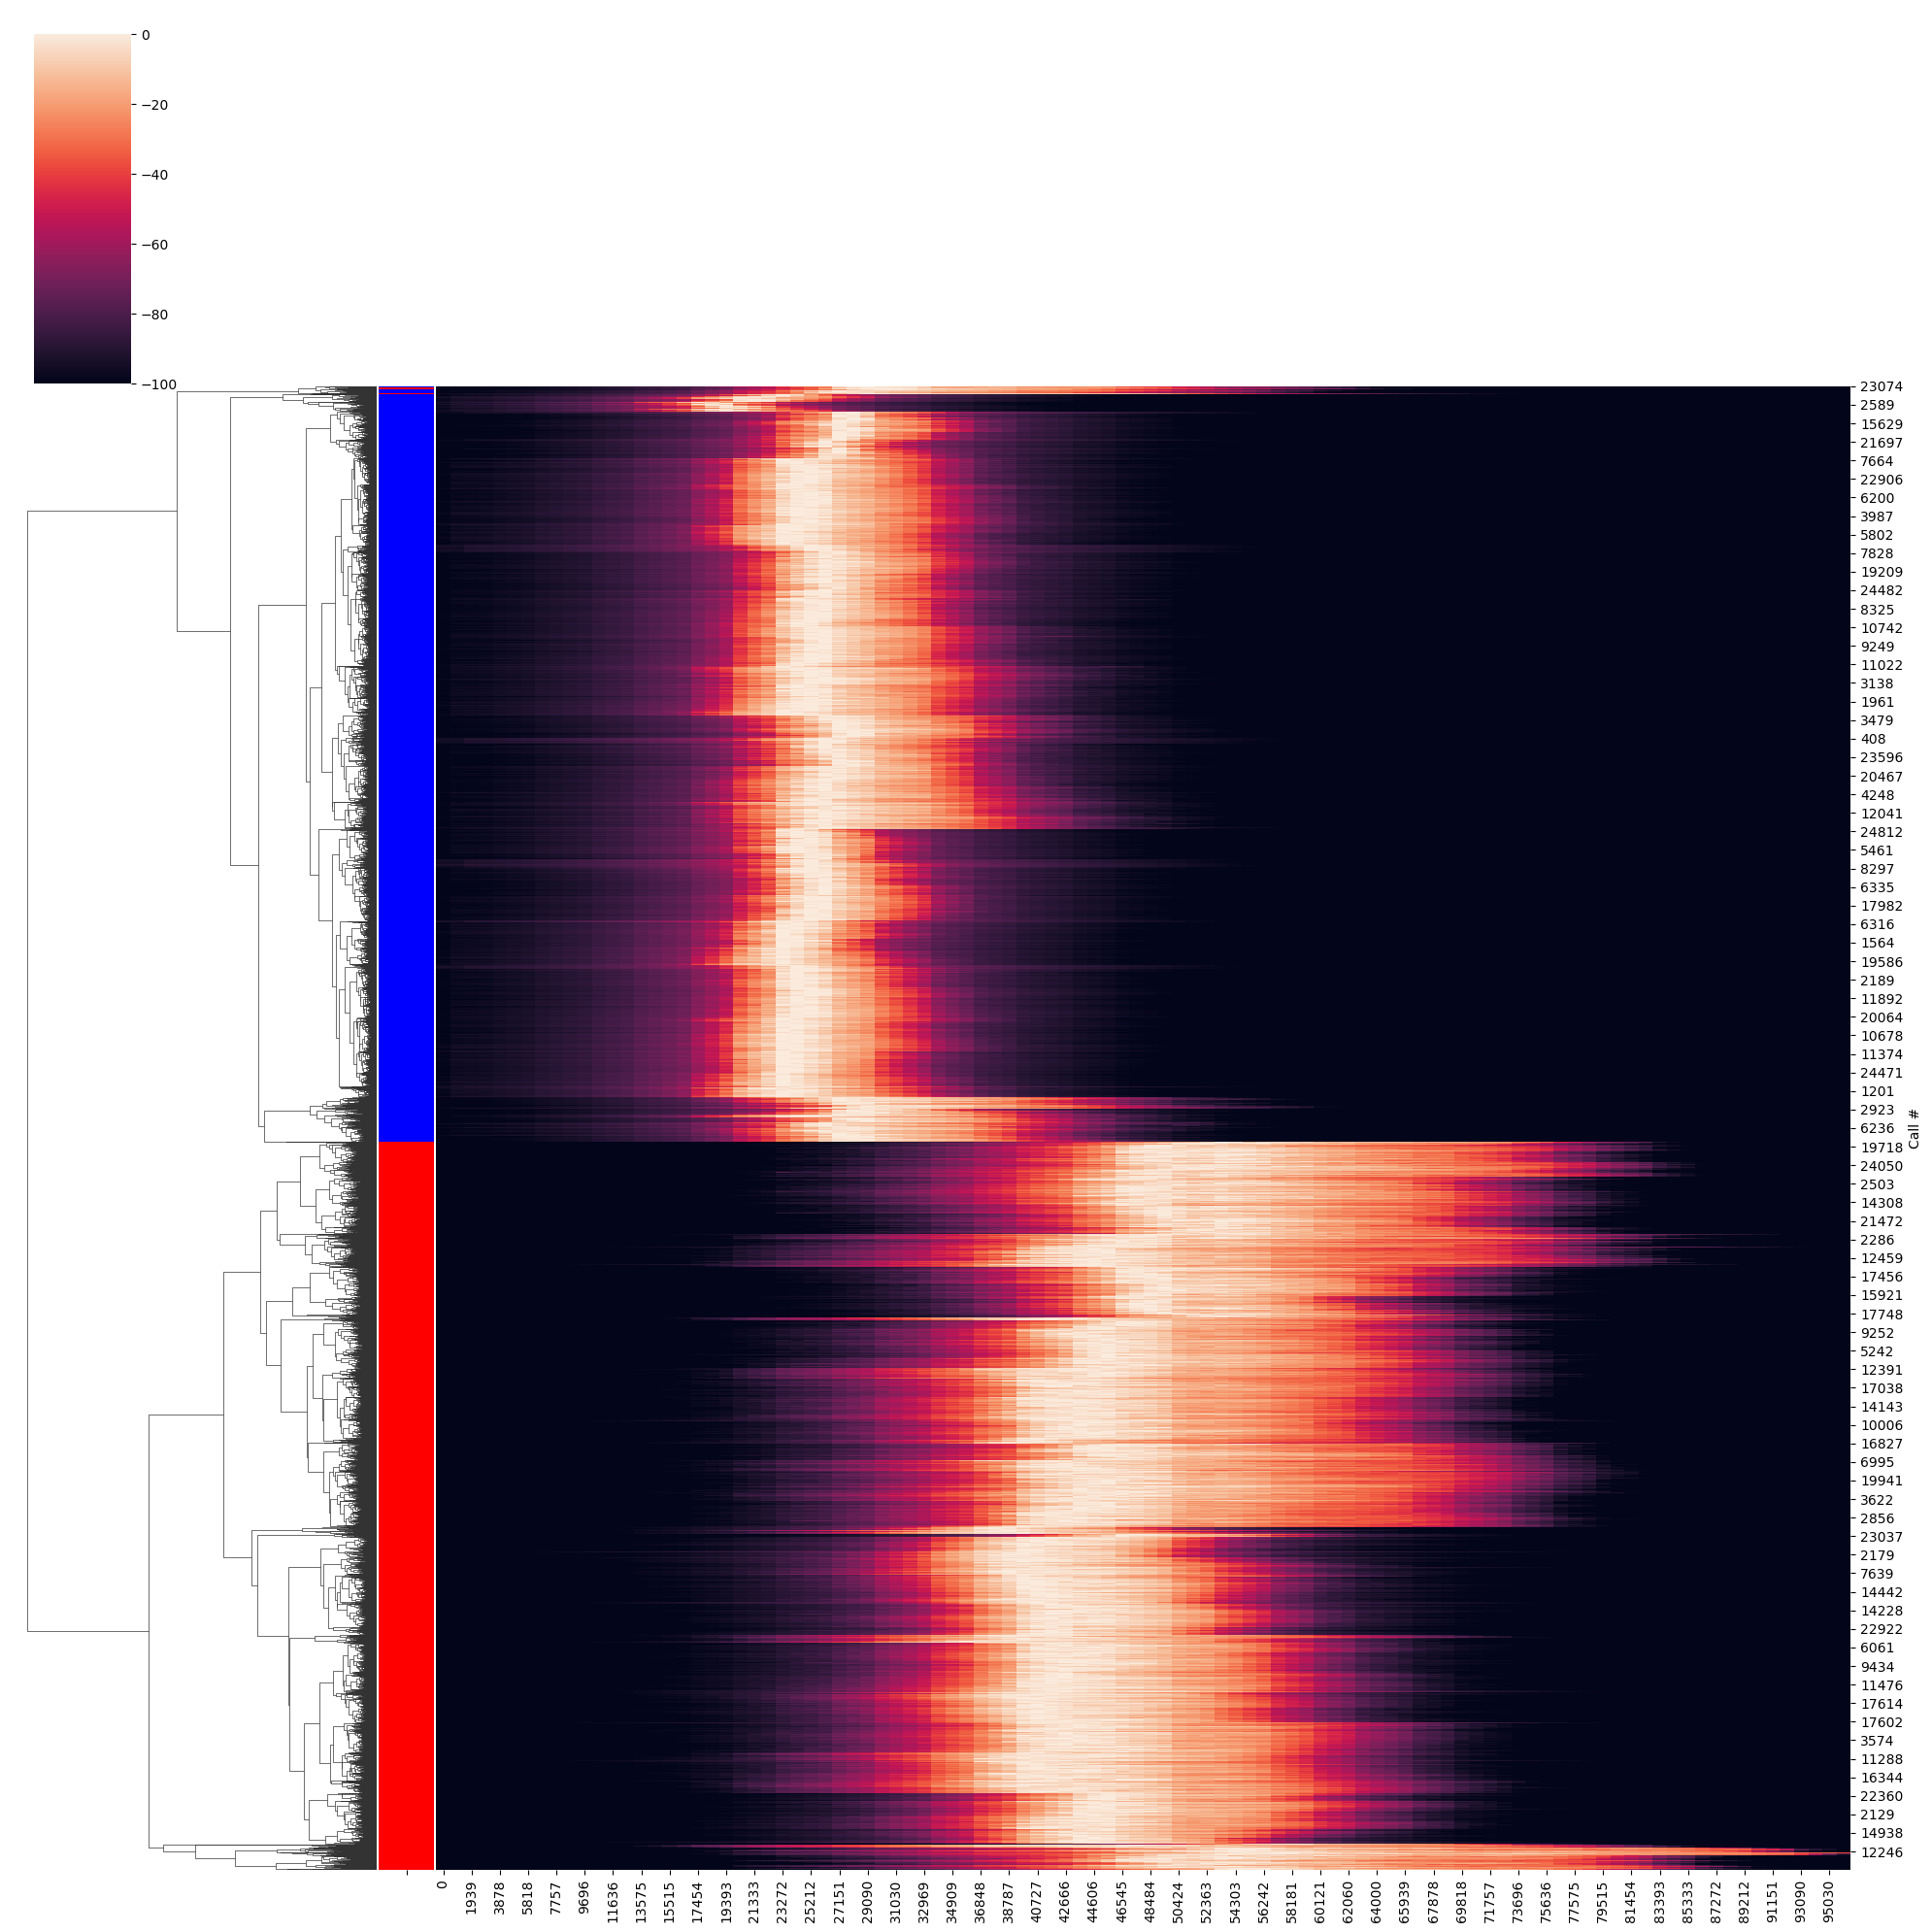

In [17]:
site_key = 'Central'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top1_inbouts_call_signals'
output_file_type = 'top1_inbouts_welch_signals'

welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)

k = 2
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=random_state_for_sites_three[site_key]).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups from {SITE_NAMES[site_key]} random_state:{random_state_for_sites_three[site_key]}')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 20), col_cluster=False, row_colors=groups_to_colors)

In [ ]:
site_key = 'Central'
input_dir = Path(f'../data/detected_calls/{site_key}')
output_dir = Path(f'../data/generated_welch/{site_key}')
if not(output_dir.is_dir()):
    output_dir.mkdir(parents=True)
input_file_type = 'top100_infile_call_signals'
output_file_type = 'top100_infile_welch_signals'

In [ ]:
# location_call_signals = np.load(input_dir / f'2022_{site_key}_{input_file_type}.npy', allow_pickle=True)
# location_calls_sampled = pd.read_csv(input_dir / f'2022_{site_key}_{input_file_type}.csv', index_col=0, low_memory=False)

# welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)
# welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
# welch_data.index.name = 'Call #'
# welch_data.columns.name = 'Frequency (kHz)'
# welch_data.to_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv')

In [ ]:
welch_data = pd.read_csv(output_dir / f'2022_{site_key}_{output_file_type}.csv', index_col=0, low_memory=False)
predictions_on_all = pd.Series(kmean_welch.predict(welch_data))
labelled_preds = predictions_on_all.map({0:'LF1', 1:'HF1'})

In [ ]:
bd2_summary = pd.read_csv(f'../data/2022_bd2_summary/{site_key}/bd2__{site_key}_2022.csv', index_col=0, low_memory=False)
bd2_summary.reset_index(inplace=True)
bd2_summary['freq_group'] = labelled_preds
bd2_summary

,index,freq_group,ref_time,call_start_time,call_end_time,start_time,end_time,low_freq,high_freq,event,class,class_prob,det_prob,individual,input_file,Site name,Recover Folder,SD Card,File Duration
0,0,LF1,2022-07-26 01:04:33.481500000,2022-07-26 01:04:33.481500000,2022-07-26 01:04:33.498400000,273.4815,273.4984,22890.0,25402.0,Echolocation,Nyctalus leisleri,0.666,0.685,-1,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,008,1795.0
1,0,LF1,2022-07-26 02:03:07.694500000,2022-07-26 02:03:07.694500000,2022-07-26 02:03:07.713700000,187.6945,187.7137,22890.0,26243.0,Echolocation,Nyctalus leisleri,0.518,0.555,-1,/mnt/ubna_data_01_mir/recover-20220728/UBNA_00...,Central Pond,recover-20220728,008,1795.0
2,0,LF1,2022-07-26 03:00:43.713500000,2022-07-26 03:00:43.713500000,2022-07-26 03:00:43.734000000,43.7135,43.7340,21171.0,23776.0,Echolocation,Nyctalus leisleri,0.709,0.724,-1,/mnt/ubna_data_01/recover-20220728/UBNA_008/20...,Central Pond,recover-20220728,UBNA_008,NaN
3,0,LF1,2022-07-26 04:00:39.600500000,2022-07-26 04:00:39.600500000,2022-07-26 04:00:39.617300000,39.6005,39.6173,22890.0,25607.0,Echolocation,Nyctalus leisleri,0.577,0.595,-1,/mnt/ubna_data_01/recover-20220728/UBNA_008/20...,Central Pond,recover-20220728,UBNA_008,NaN
4,0,LF1,2022-07-26 04:33:06.203500000,2022-07-26 04:33:06.203500000,2022-07-26 04:33:06.218400000,186.2035,186.2184,22890.0,27896.0,Echolocation,Nyctalus leisleri,0.381,0.551,-1,/mnt/ubna_data_01/recover-20220728/UBNA_008/20...,Central Pond,recover-20220728,UBNA_008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415059,14,HF1,2022-10-17 10:22:20.942500000,2022-10-17 10:22:20.942500000,2022-10-17 10:22:20.950300000,1340.9425,1340.9503,46953.0,63630.0,Echolocation,Pipistrellus pipistrellus,0.420,0.575,-1,/mnt/ubna_data_02/recover-20221017/UBNA_009/20...,Central Pond,recover-20221017,009,NaN
415060,15,HF1,2022-10-17 10:22:21.058500000,2022-10-17 10:22:21.058500000,2022-10-17 10:22:21.064900000,1341.0585,1341.0649,44375.0,73322.0,Echolocation,Pipistrellus pipistrellus,0.366,0.529,-1,/mnt/ubna_data_02/recover-20221017/UBNA_009/20...,Central Pond,recover-20221017,009,NaN
415061,16,HF1,2022-10-17 10:22:21.332500000,2022-10-17 10:22:21.332500000,2022-10-17 10:22:21.340100000,1341.3325,1341.3401,43515.0,64806.0,Echolocation,Pipistrellus pipistrellus,0.463,0.612,-1,/mnt/ubna_data_02/recover-20221017/UBNA_009/20...,Central Pond,recover-20221017,009,NaN
415062,17,HF1,2022-10-17 10:22:21.830500000,2022-10-17 10:22:21.830500000,2022-10-17 10:22:21.840800000,1341.8305,1341.8408,46953.0,62214.0,Echolocation,Pipistrellus pipistrellus,0.339,0.511,-1,/mnt/ubna_data_02/recover-20221017/UBNA_009/20...,Central Pond,recover-20221017,009,NaN
